<a href="https://colab.research.google.com/github/catalinatrevisan/tp-final-analitica/blob/main/notebooks/eda_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de librerías necesarias

In [26]:
# importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

## Ingesta de los datos desde el repositorio

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/catalinatrevisan/tp-final-analitica/refs/heads/main/data/raw/online_gaming_behavior_dataset.csv")

## Análisis exploratorio inicial de los datos

In [4]:
# Forma
print(f"Dimensiones: {df.shape}")

# Primeras filas
print("\nPrimeras filas:")
display(df.head())

# Info del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
display(df.describe())


Dimensiones: (40034, 13)

Primeras filas:


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [20]:
# El único error que detectamos en el df es el tipo de datos de la variable InGamePurchases
# Lo pasamos a tipo de dato booleano

df['InGamePurchases'] = df['InGamePurchases'].astype(bool)


In [41]:
# Identificamos los diferentes timpos de columnas
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [22]:
# Análisis de valores nulos
missing_df = pd.DataFrame({
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('% Nulos', ascending=False)

if missing_df['Nulos'].sum() == 0:
    print("No se encontraron valores nulos en el dataset")
else: print(missing_df[missing_df['Nulos'] > 0])

No se encontraron valores nulos en el dataset


In [23]:
# Análisis de duplicados
duplicates = df.duplicated().sum()
print(f"Filas duplicadas: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nEjemplo de filas duplicadas:")
    display(df[df.duplicated(keep=False)].head(10))


Filas duplicadas: 0 (0.00%)


In [24]:
# Análisis de valores únicos
unique_analysis = pd.DataFrame({
    'Valores Únicos': df.nunique(),
    '% Cardinalidad': (df.nunique() / len(df) * 100).round(2)
}).sort_values('% Cardinalidad', ascending=False)

display(unique_analysis)

,Valores Únicos,% Cardinalidad
PlayerID,40034,100.00
PlayTimeHours,40034,100.00
AvgSessionDurationMinutes,170,0.42
PlayerLevel,99,0.25
AchievementsUnlocked,50,0.12
Age,35,0.09
SessionsPerWeek,20,0.05
Location,4,0.01
GameGenre,5,0.01
EngagementLevel,3,0.01


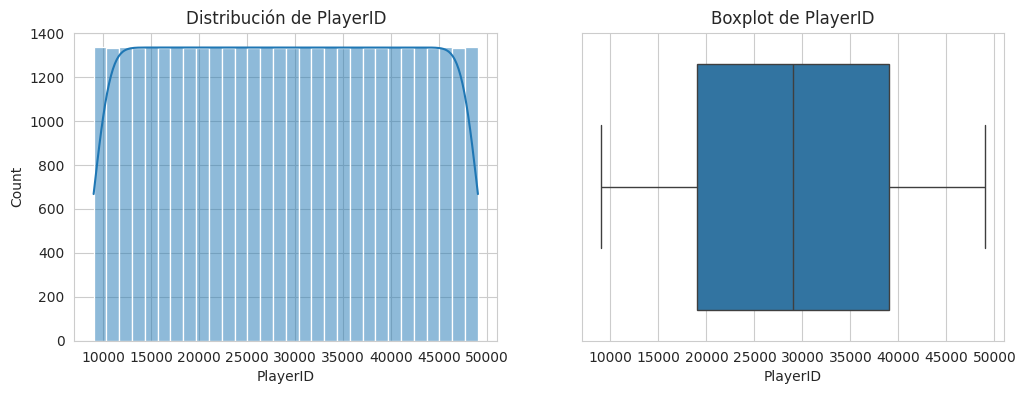

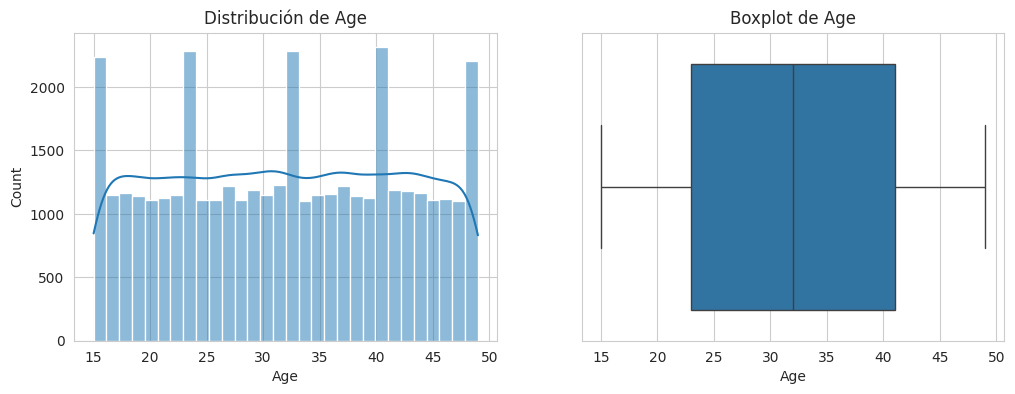

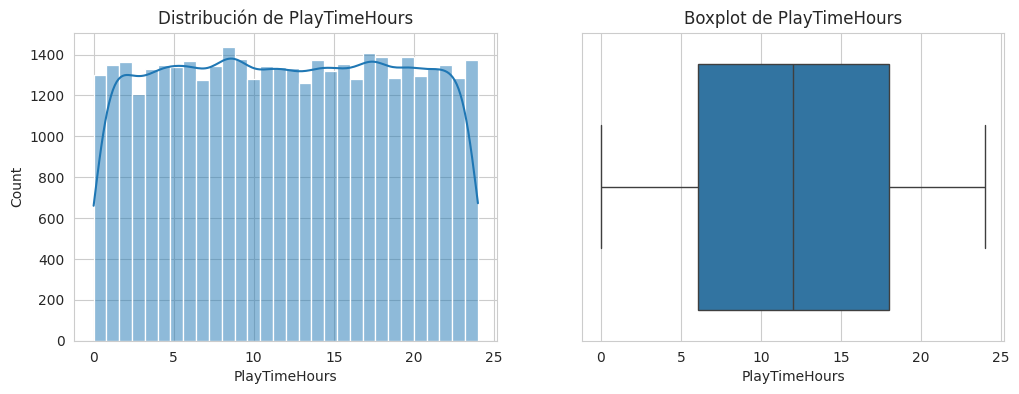

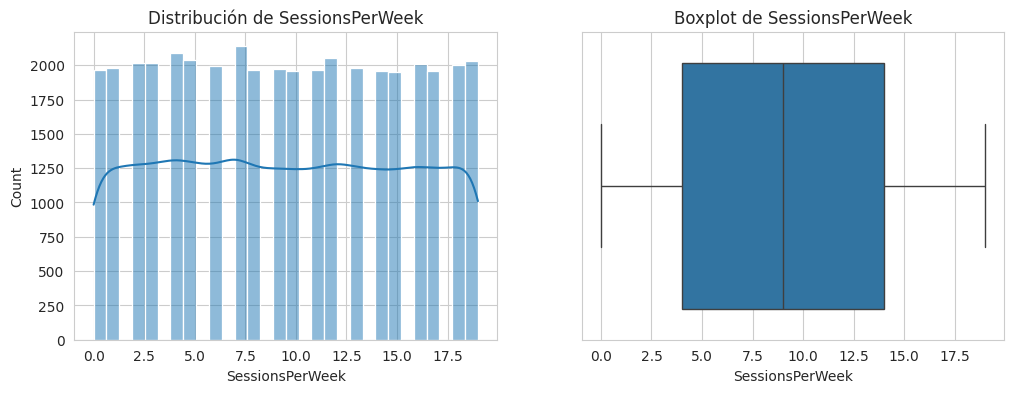

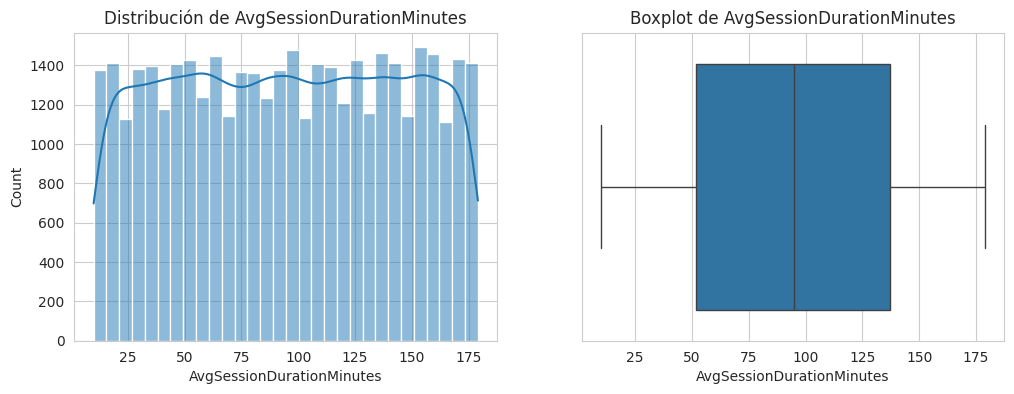

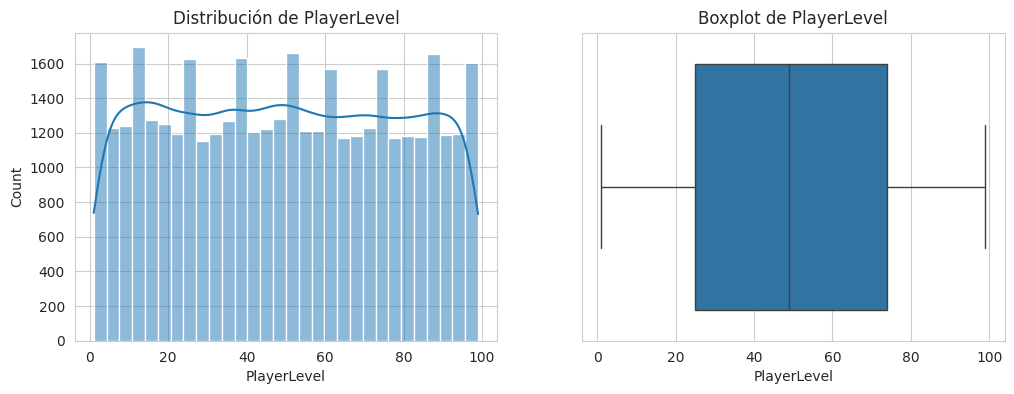

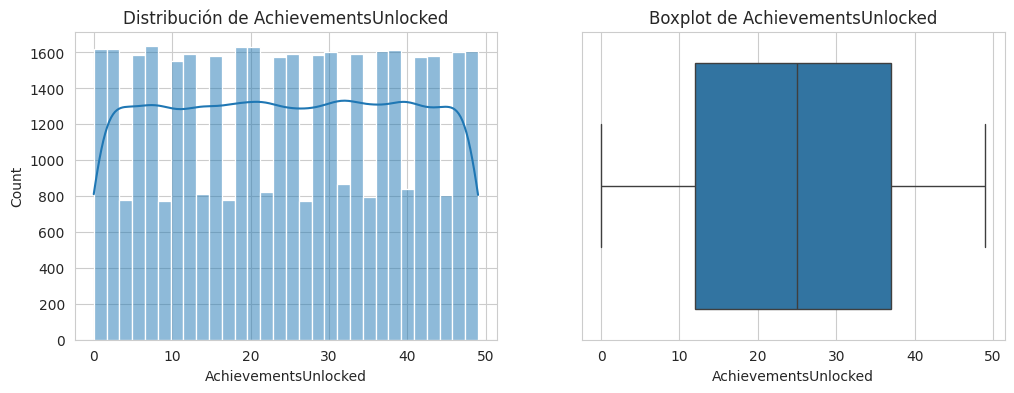

In [42]:
# Análisis de outliers

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histograma + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.show()

In [43]:
# Ánalisis de outliers

# Confirmamos que el análisis gráfico sea correcto utilizando diferentes métdos

def detect_outliers_multiple_methods(df, column):
    """
    Detecta outliers usando múltiples métodos
    """
    data = df[column].dropna()
    results = {}

    # Método 1: Z-Score
    z_scores = np.abs(stats.zscore(data))
    z_outliers_4 = data[z_scores > 4].index.tolist()
    results['Z-Score (>4)'] = len(z_outliers_4)

    # Método 2: IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    results['IQR'] = len(iqr_outliers)

    return results, z_outliers_4  # Retornamos los outliers según el criterio del ejercicio

print("Variables con outliers y métodos de detección:")
outlier_summary = {}
outliers_by_variable = {}

for col in numeric_cols:
    if col in df.columns and df[col].notna().sum() > 0:
        methods_results, main_outliers = detect_outliers_multiple_methods(df, col)
        outlier_summary[col] = methods_results
        outliers_by_variable[col] = main_outliers

        print(f"\n{col}:")
        for method, count in methods_results.items():
            print(f"  - {method}: {count} outliers")


Variables con outliers y métodos de detección:

PlayerID:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

Age:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

PlayTimeHours:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

SessionsPerWeek:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

AvgSessionDurationMinutes:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

PlayerLevel:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers

AchievementsUnlocked:
  - Z-Score (>4): 0 outliers
  - IQR: 0 outliers


## Análisis exploratorio inicial con visualizaciones

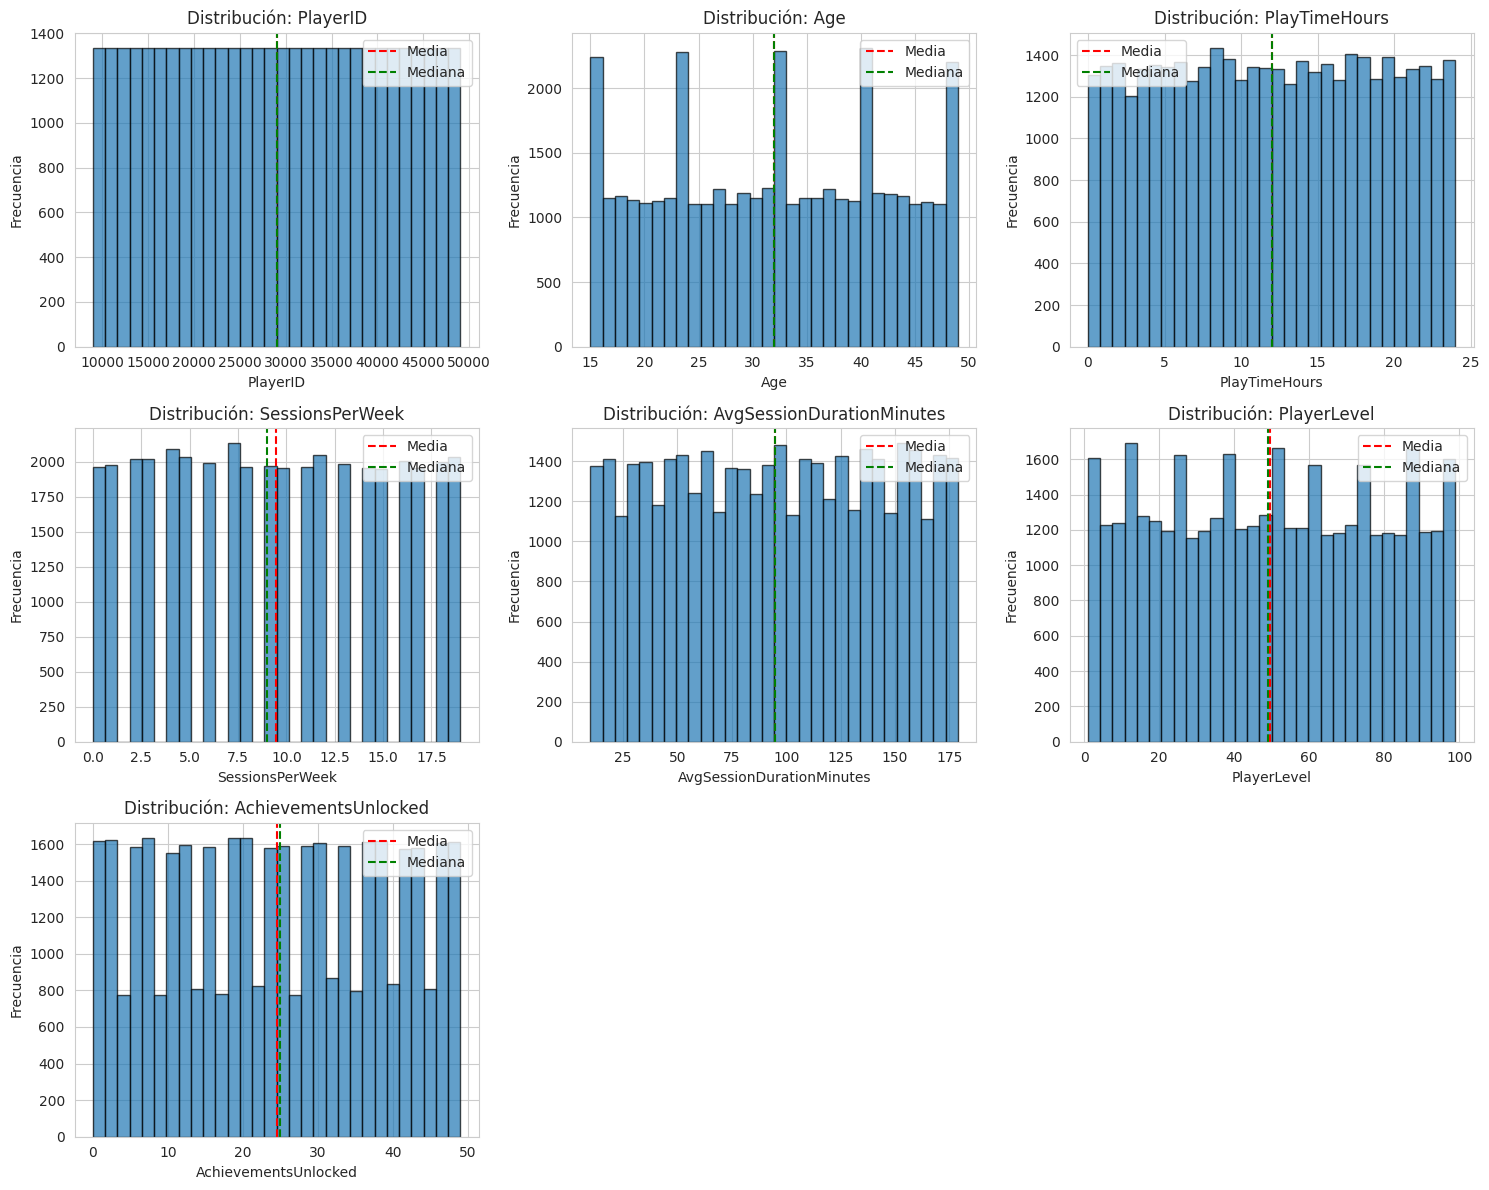

In [44]:
# Distribuciones de variables numéricas

fig, axes = plt.subplots(nrows=(len(numeric_cols)+2)//3, ncols=3, figsize=(15, 4*((len(numeric_cols)+2)//3)))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', label='Media')
        axes[idx].axvline(df[col].median(), color='green', linestyle='--', label='Mediana')
        axes[idx].legend()

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

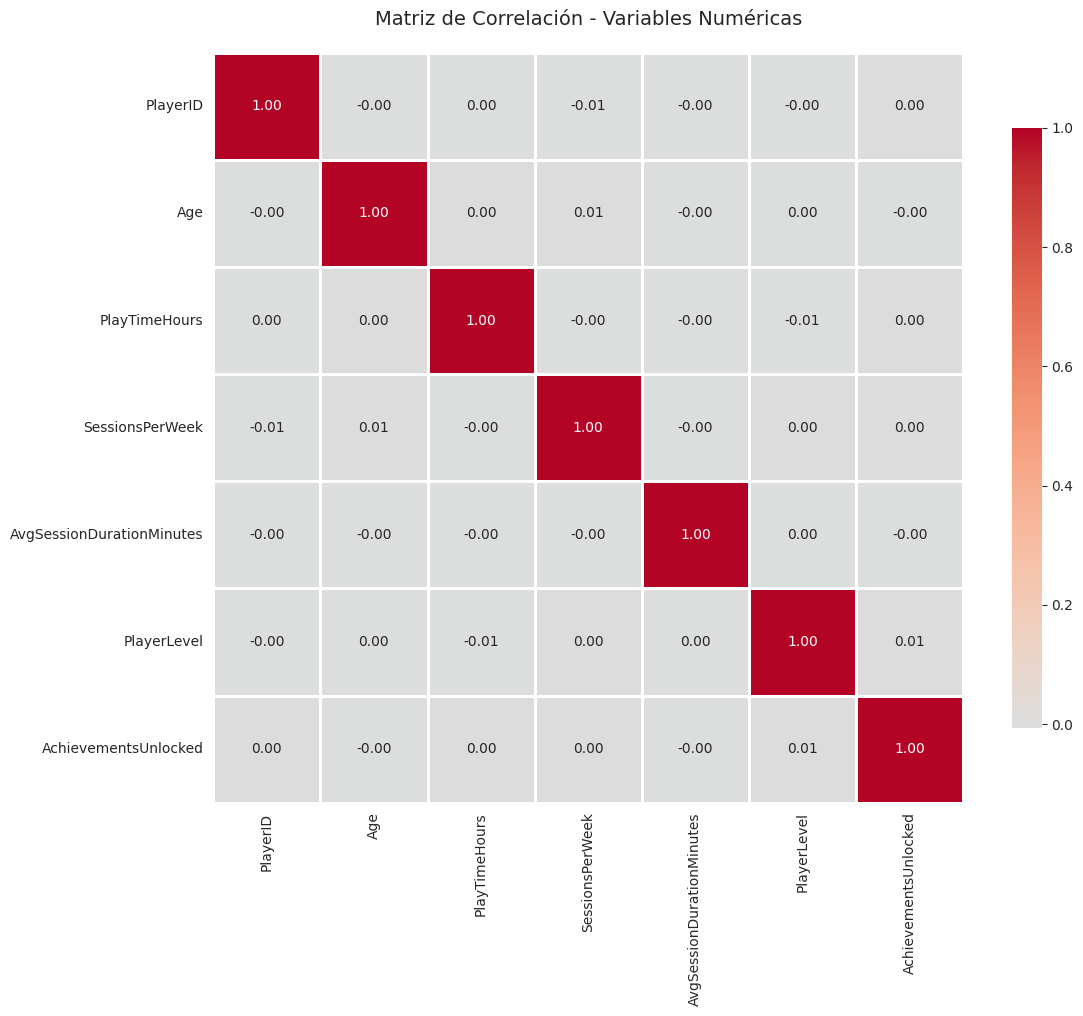


Correlaciones fuertes (|r| > 0.5):
No se encontraron correlaciones fuertes


In [46]:
# Matriz de correlación

if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    # Identificar correlaciones fuertes
    print("\nCorrelaciones fuertes (|r| > 0.5):")
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                high_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlación': correlation_matrix.iloc[i, j]
                })

    if high_corr:
        display(pd.DataFrame(high_corr))
    else:
        print("No se encontraron correlaciones fuertes")


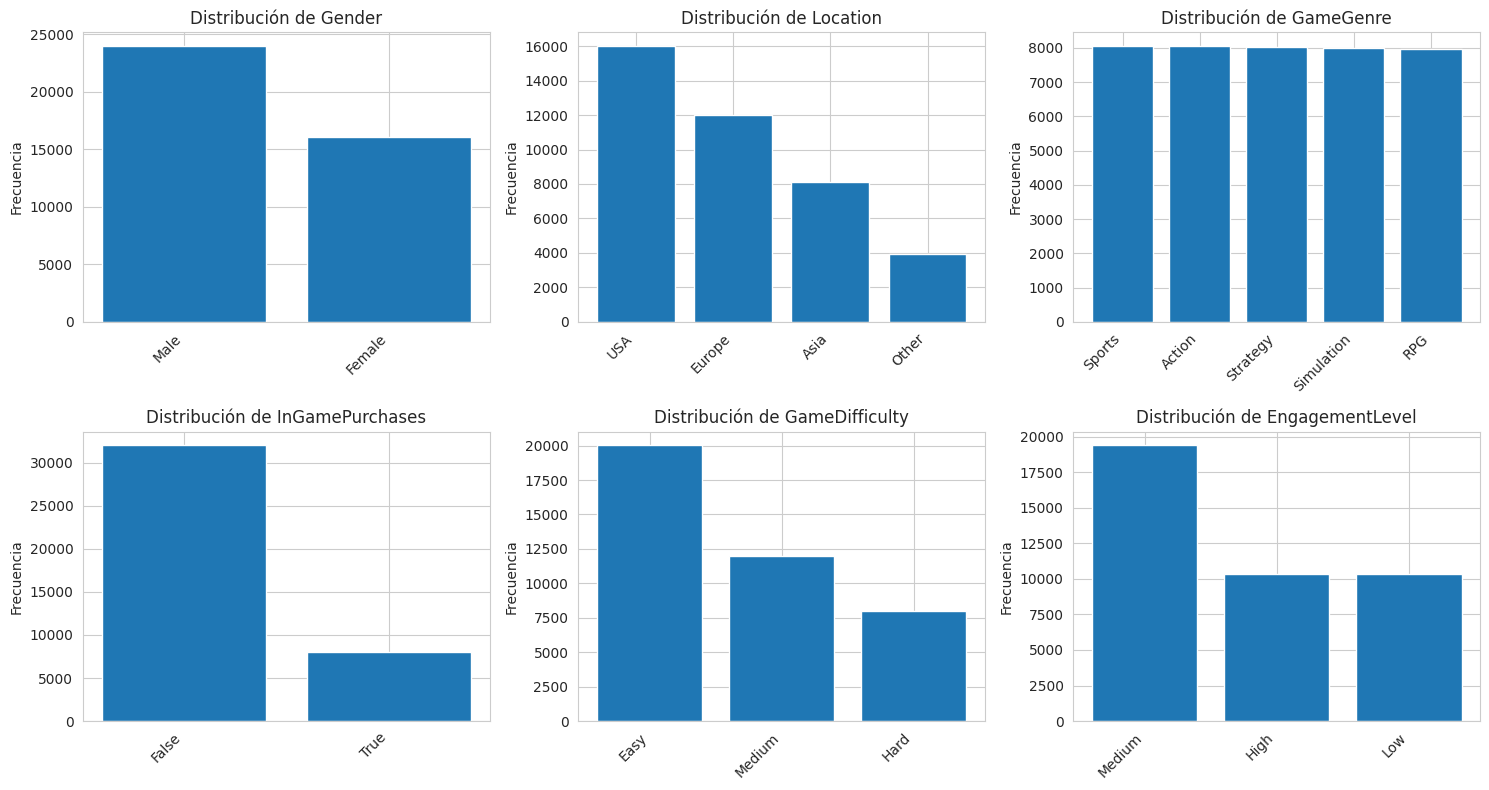

In [50]:
# Análisis de variables categóricas

nrows = (len(categorical_cols) + 2) // 3
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts().head(10)

    ax.bar(range(len(value_counts)), value_counts.values)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {col}')

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


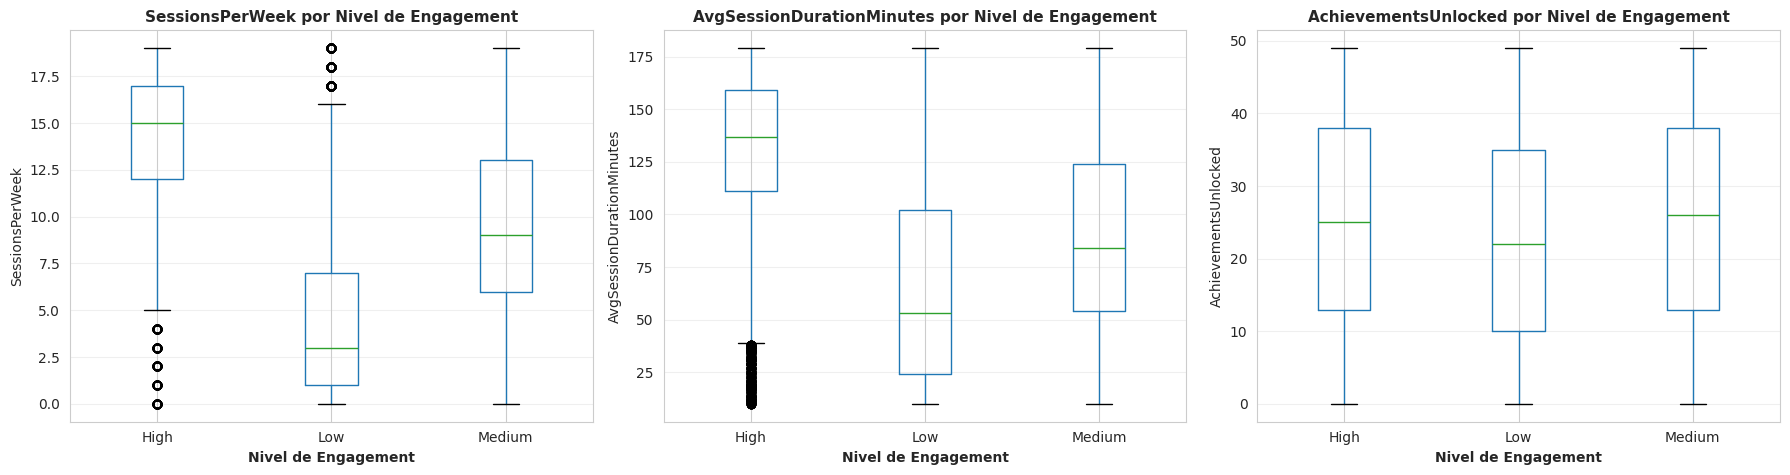



Estadísticas de Hábitos de Uso por Nivel de Engagement:

SessionsPerWeek:


,mean,median,std
Engagement_Categoria,,,
High,14.25,15.0,3.91
Low,4.53,3.0,4.86
Medium,9.55,9.0,4.76



AvgSessionDurationMinutes:


,mean,median,std
Engagement_Categoria,,,
High,131.92,137.0,34.07
Low,66.88,53.0,48.59
Medium,89.86,84.0,43.72



AchievementsUnlocked:


,mean,median,std
Engagement_Categoria,,,
High,25.10,25.0,14.42
Low,22.66,22.0,14.19
Medium,25.22,26.0,14.48


In [66]:
# Análisis de Hábitos por Niveles de Engagement

engagement_var = 'EngagementLevel'
frequency_var = 'SessionsPerWeek'
duration_var = 'AvgSessionDurationMinutes'
achievements_var = 'AchievementsUnlocked'

if engagement_var and engagement_var in df.columns:
    # Crear categorías de engagement
    df_temp = df.copy()

    if df_temp[engagement_var].dtype in ['int64', 'float64']:
        # Si es numérica, crear cuartiles
        df_temp['Engagement_Categoria'] = pd.qcut(df_temp[engagement_var], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'], duplicates='drop')
    else:
        # Si ya es categórica, usarla directamente
        df_temp['Engagement_Categoria'] = df_temp[engagement_var]

    # Comparar hábitos de uso entre niveles de engagement
    usage_vars_valid = [v for v in [frequency_var, duration_var, achievements_var] if v in df.columns and df[v].dtype in ['int64', 'float64']]

    if len(usage_vars_valid) > 0:
        fig, axes = plt.subplots(1, len(usage_vars_valid), figsize=(6*len(usage_vars_valid), 5))
        if len(usage_vars_valid) == 1:
            axes = [axes]

        for idx, var in enumerate(usage_vars_valid):
            df_temp.boxplot(column=var, by='Engagement_Categoria', ax=axes[idx])
            axes[idx].set_title(f'{var} por Nivel de Engagement', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('Nivel de Engagement', fontsize=10, fontweight='bold')
            axes[idx].set_ylabel(var, fontsize=10)
            axes[idx].get_figure().suptitle('')  # Remover título automático
            axes[idx].grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Estadísticas descriptivas por grupo
        print("\n\nEstadísticas de Hábitos de Uso por Nivel de Engagement:")
        for var in usage_vars_valid:
            print(f"\n{var}:")
            group_stats = df_temp.groupby('Engagement_Categoria')[var].agg(['mean', 'median', 'std']).round(2)
            display(group_stats)


## Preprocesamiento inicial

## Ingeniería de variables inicial